# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


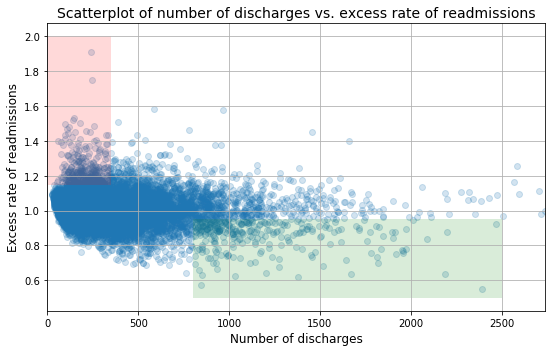

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. 
1. Most data points are clustered around one area. The above analysis is focused on green and red region where there is a lot lot less datapoints. It is not right to base your analysis on a select part of the entire data set.<br>
2. The claim that there is a correlation between hospital capacity and readmission rate is not funded on any correlation analysis.<br>
3. The cutoff of 300 for hospital capacity is not based on any calculation.<br>
4. Finally, their conclusion doesn't acknowledge there could other factors in play such as what measure caused patient to come back (heart attack, pneumonia and so on)
5. list are not required for mpl scatter plot and why slice from 81 to 3rd to last ??

B. 
1) We will test if the excess readmission ratio correlates with the number of discharges.<br>
**Null hypothesis:** readmission ratio and number of discharge are independent.<br>
**Alternate hypothesis:** there are correlated.

In [5]:
# read in readmissions data provided
df_hospital = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


B. 2) Compute p-value

* Data cleansing

In [7]:
# let's keep only Number of Discharges and Excess Readmission Ratio
df_select = df_hospital[['Number of Discharges', 'Excess Readmission Ratio']].copy()

# there are nan values in ratio => drop those records
df_select = df_select.dropna()

# there are missing values labelled as 'Not Available' in number of discharges, drop them
df_select = df_select[df_select['Number of Discharges'] != 'Not Available']

# convert number of discharge from object to integer
df_select['Number of Discharges'] = df_select['Number of Discharges'].astype(int)

* Observed correlation

In [8]:
# pearson correlation
obs_corr = df_select.corr().iloc[0,1]
print('Observed pearson correlation coefficient ', obs_corr)

Observed pearson correlation coefficient  -0.0973979435108


A negative correlation of 0.1 is very low. Is it significant? Did we obtain this result by chance?<br>
Let's permute one parameter (say number of discharges) many times and calculate the probability that we obtain a correlation at least as extreme as our observation assuming both parameters are uncorrelated.

* P-value

In [9]:
def draw_perm_replicates(df, size = 1):
    """
    Data: pandas dataframe
    size: number of permutation replicates
    Returns a numpy array of pearson correlation coefficient as large as size
    """
    
    perm_corr = np.empty(size)
    
    for i in range(size):
        # resample without replacement (permutation)
        perm_data = df['Number of Discharges'].sample(n = len(df), replace = False)
        
        # compute correlation
        perm_corr[i] = np.corrcoef(df['Excess Readmission Ratio'], perm_data)[0,1]
    
    return perm_corr

In [10]:
# generate permutation replicates
num_perm = int(1e6)
perm_corr = draw_perm_replicates(df_select, size = num_perm)

Assuming our two quantities are independent (we observed -0.1 by chance), <br>
what is the probability we obtain a pearson correlation at least as extreme as we observed by chance?
(meaning as low as -0.1 or lower)

In [11]:
p_val = np.sum( perm_corr <=  obs_corr) / num_perm
print('P-value = ', p_val)

P-value =  0.0


B. 3)
Conclusion: We reject our null hypothesis because $p value < 0.01 $<br>
Actually, we couldn't find one instance out of 1 million where pearson correlation is as low as -0.1 or lower. <br>
It seems that number of discharges and excess readmission rate are negatively correlated by 10%. Higher capacity hospital do have 10% lower excess readmission rate.

B. 4) Statistic significance and practical significance do differ.
One needs to choose statistic significance which yields an acceptable tradeoff between Type I and Type II errors
Lowering our statistic significance lowers Type I error (reject null when it was true) but increase Type II error (failed to reject when it was false).

B. 5) Scatter plot are great to display data as a function of two variables. But when you have too much data overlapping, you cannot tell the significance in distribution (transparency helps but it is not enough)<br>
Contour plot are more adequate. Seaborn has a kde plot where it even shows the pearson correlation and its associated p-value! It is very likely that our two quantities are correlated.

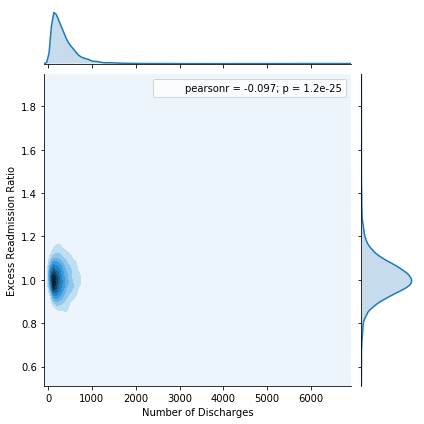

In [12]:
import seaborn as sns
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df_select, kind="kde")